<a href="https://colab.research.google.com/github/jongsoochoi/Brand_Detective/blob/main/nike_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 이미지 파일의 경로
base_path = "/content/drive/MyDrive/Colab Notebooks/data/3조_수집_데이터/비교로고/"

image_path1 = base_path + "nike.jpg"
image_path2 = base_path + "nike_logo_tilted_02.jpg"
image_path3 = base_path + "nike_tilted_01.jpg"
image_path4 = base_path + "fake_nike_front_01.jpg"
image_path5 = base_path + "fake_nike_front_02.jpg"
image_path6 = base_path + "fake_nike_22.jpg"
image_path7 = base_path + "nike_tilted_02.jpg"
image_path6 = base_path + "fake_nike_22.jpg"
image_path7 = base_path + "nike_tilted_02.jpg"
image_path8 = base_path + 'addidas-0_720.jpg'
image_path9 = base_path + 'addidas-1_480'
image_path10 = base_path + 'nike-0_480.png'



# 해당 폴더내 이미지 불러오기

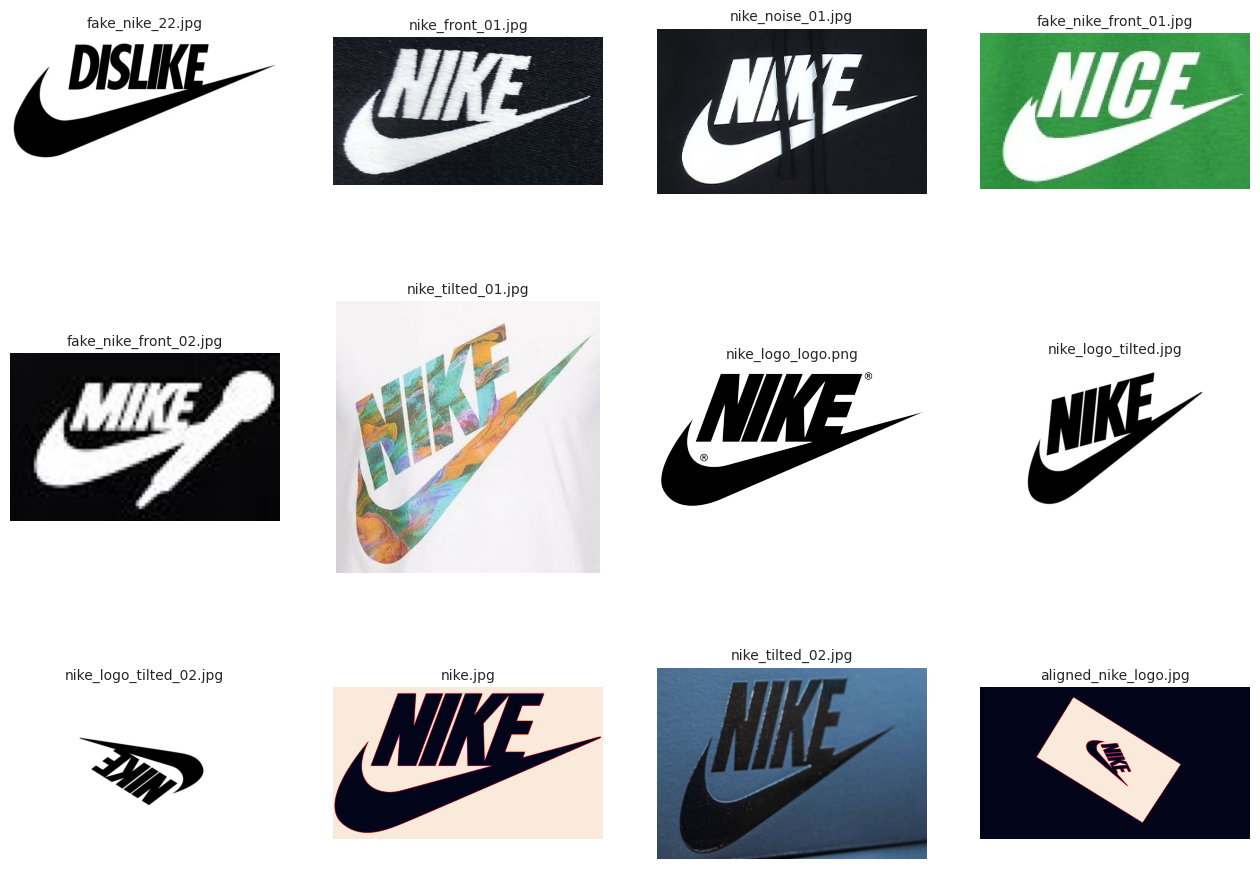

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# 이미지를 찾을 디렉토리 경로
base_path = "/content/drive/MyDrive/Colab Notebooks/data/3조_수집_데이터/비교로고/"

# 디렉토리에 있는 이미지 파일들의 경로 얻기
image_paths = [os.path.join(base_path, file) for file in os.listdir(base_path) if file.endswith(('png', 'jpg', 'jpeg'))]

# 이미지들을 담을 리스트 생성
images = []
image_names = []

# 이미지 파일들을 열어서 리스트에 추가
for path in image_paths:
    img = Image.open(path)
    images.append(img)
    image_names.append(os.path.basename(path))  # 파일 이름을 리스트에 추가

# 이미지들을 그리기
fig, axes = plt.subplots(nrows=len(images)//4 , ncols=4, figsize=(16, 4*(len(images)//4 )))

for i, ax in enumerate(axes.flatten()):
    if i < len(images):
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(image_names[i], fontsize=10)  # 이미지 이름을 제목으로 추가

plt.show()


In [ ]:
# 흑백 이미지 출력

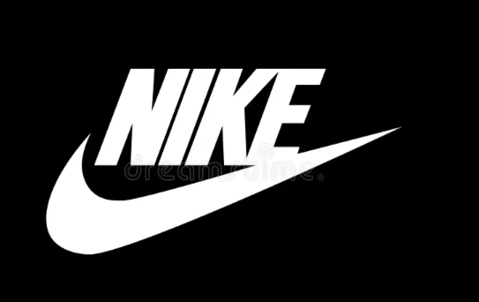

이미지 높이: 302, 이미지 너비: 479, 채널 수: 3


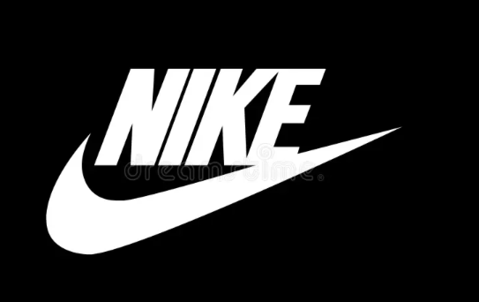

In [ ]:
import cv2
from IPython.display import display, Image


# 이미지 파일 경로
image_path = image_path10

# OpenCV를 사용하여 이미지 열기 (컬러 이미지)
img_color = cv2.imread(image_path)

# 이미지 표시
display(Image(data=cv2.imencode('.png', img_color)[1]))

# 이미지의 크기 출력
height, width, channels = img_color.shape
print(f"이미지 높이: {height}, 이미지 너비: {width}, 채널 수: {channels}")

# 이미지 열기
img_gray = cv2.imread(image_path10, cv2.IMREAD_GRAYSCALE)

# 이미지 열기
display(Image(data=cv2.imencode('.png', img_gray)[1]))

#ORB 유사도 평가

In [ ]:
from google.colab.patches import cv2_imshow

def evaluate_similarity(matches, threshold=50):
    accurate_matches = [match for match in matches if match.distance < threshold]
    accuracy = len(accurate_matches) / len(matches) * 100
    return accuracy


def calculate_top_matches(matches, N=10):
    # 매칭된 상위 N개의 매치 추출
    top_matches = sorted(matches, key=lambda x: x.distance)[:N]

    # 상위 N개 매치의 디스턴스를 추출하여 배열로 변환
    distances = np.array([match.distance for match in top_matches])

    # 상위 N개 매치의 디스턴스 평균 계산
    average_distance = np.mean(distances)

    # 상위 N개 매치 출력
    for i, match in enumerate(top_matches, 1):
        print(f"매치 {i}: QueryIdx={match.queryIdx}, TrainIdx={match.trainIdx}, Distance={match.distance}")

    # 결과 출력
    print(f"\n상위 {N}개 매치의 평균 디스턴스: {average_distance}")



def calculate_image_similarity(image1_path, image2_path):
    # 이미지 읽기
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # ORB 특징 디스크립터 추출기 생성
    orb = cv2.ORB_create()

    # 특징 포인트 및 디스크립터 찾기
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)


    # BFMatcher 객체 생성 및 매칭 수행
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # 결과 이미지에 매칭된 특징 그리기
    result_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None)

    # 결과 이미지 표시
    cv2_imshow(result_image)

    calculate_top_matches(matches)

    # 유사성 평가
    accuracy = evaluate_similarity(matches)

    # 결과 출력
    print("이미지 유사성 (정확도): {:.2f}%".format(accuracy))


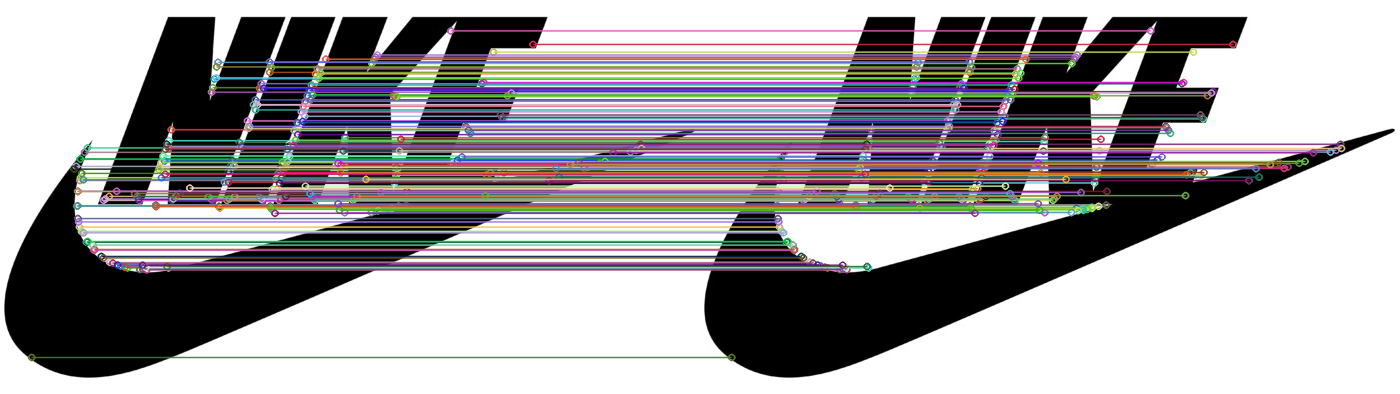

매치 1: QueryIdx=0, TrainIdx=0, Distance=0.0
매치 2: QueryIdx=1, TrainIdx=1, Distance=0.0
매치 3: QueryIdx=2, TrainIdx=2, Distance=0.0
매치 4: QueryIdx=3, TrainIdx=3, Distance=0.0
매치 5: QueryIdx=4, TrainIdx=4, Distance=0.0
매치 6: QueryIdx=5, TrainIdx=5, Distance=0.0
매치 7: QueryIdx=6, TrainIdx=6, Distance=0.0
매치 8: QueryIdx=7, TrainIdx=7, Distance=0.0
매치 9: QueryIdx=8, TrainIdx=8, Distance=0.0
매치 10: QueryIdx=9, TrainIdx=9, Distance=0.0

상위 10개 매치의 평균 디스턴스: 0.0
이미지 유사성 (정확도): 100.00%


In [ ]:
# 같은 이미지
calculate_image_similarity(image_paths[9], image_paths[9])

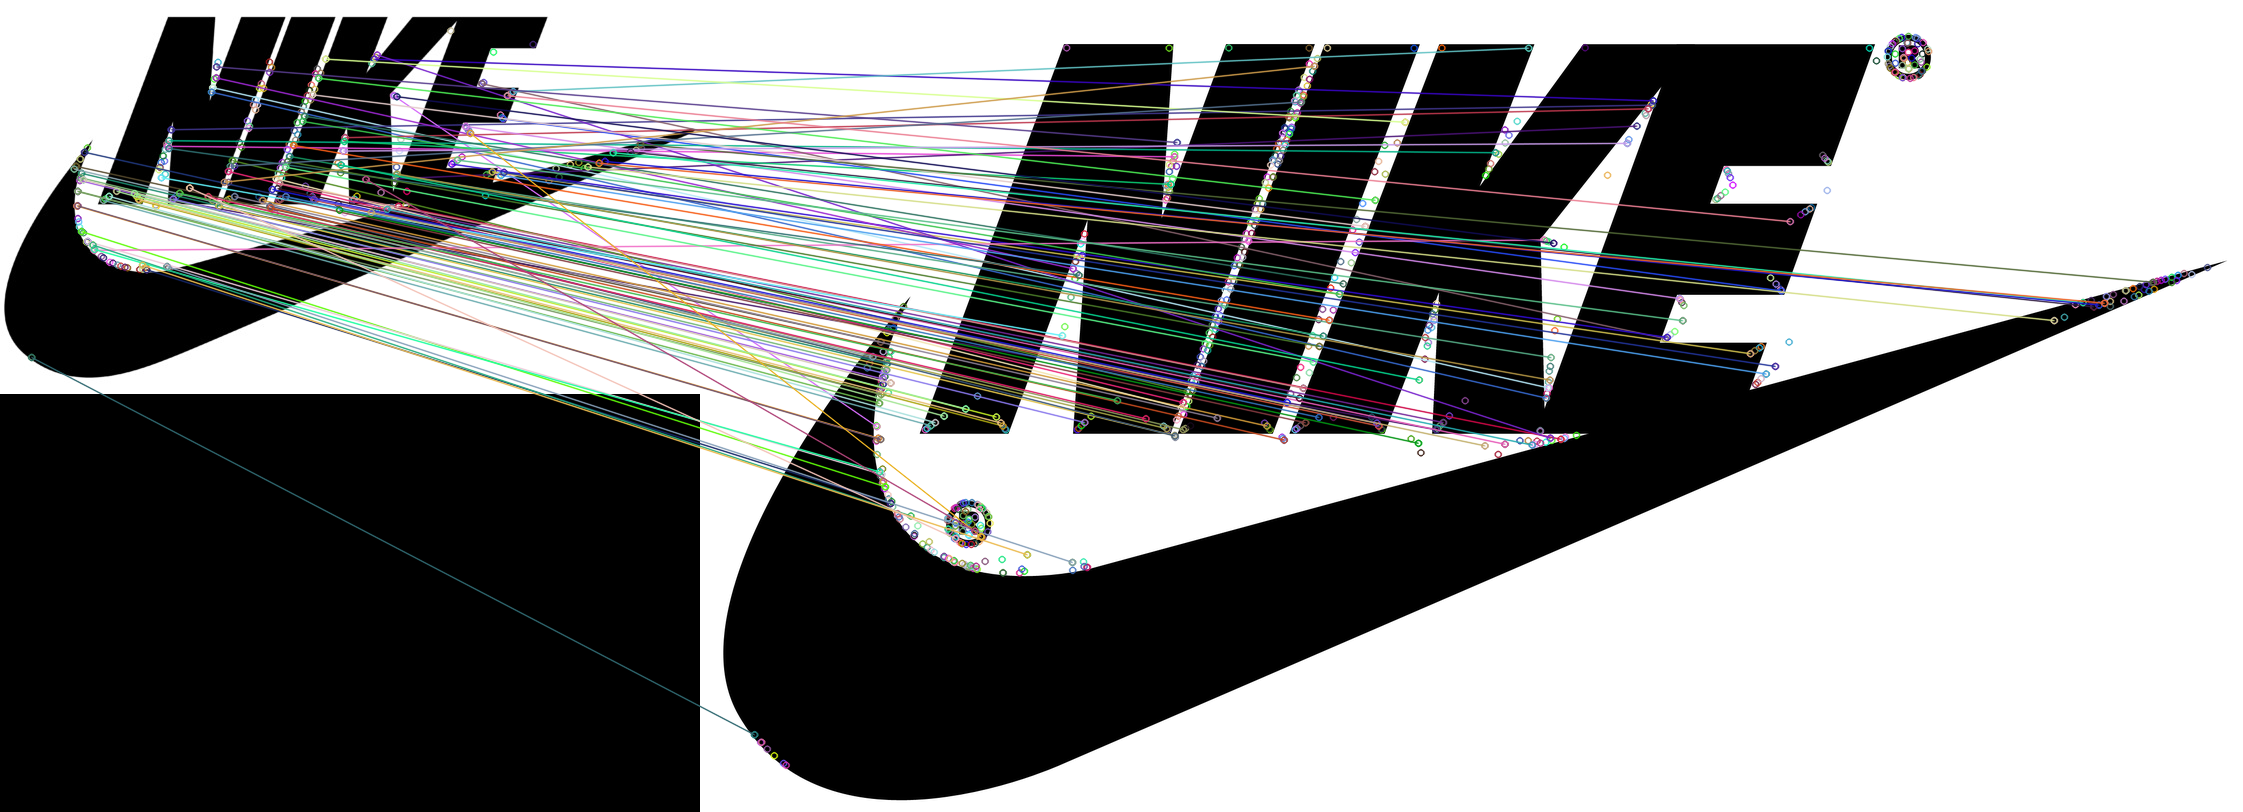

매치 1: QueryIdx=182, TrainIdx=410, Distance=4.0
매치 2: QueryIdx=3, TrainIdx=96, Distance=6.0
매치 3: QueryIdx=180, TrainIdx=411, Distance=6.0
매치 4: QueryIdx=28, TrainIdx=376, Distance=12.0
매치 5: QueryIdx=38, TrainIdx=430, Distance=13.0
매치 6: QueryIdx=40, TrainIdx=436, Distance=13.0
매치 7: QueryIdx=42, TrainIdx=301, Distance=13.0
매치 8: QueryIdx=44, TrainIdx=438, Distance=13.0
매치 9: QueryIdx=43, TrainIdx=101, Distance=14.0
매치 10: QueryIdx=110, TrainIdx=238, Distance=14.0

상위 10개 매치의 평균 디스턴스: 10.8
이미지 유사성 (정확도): 67.31%


In [ ]:
# 거의 유사한 이미지
calculate_image_similarity(image_paths[9], image_paths[6])

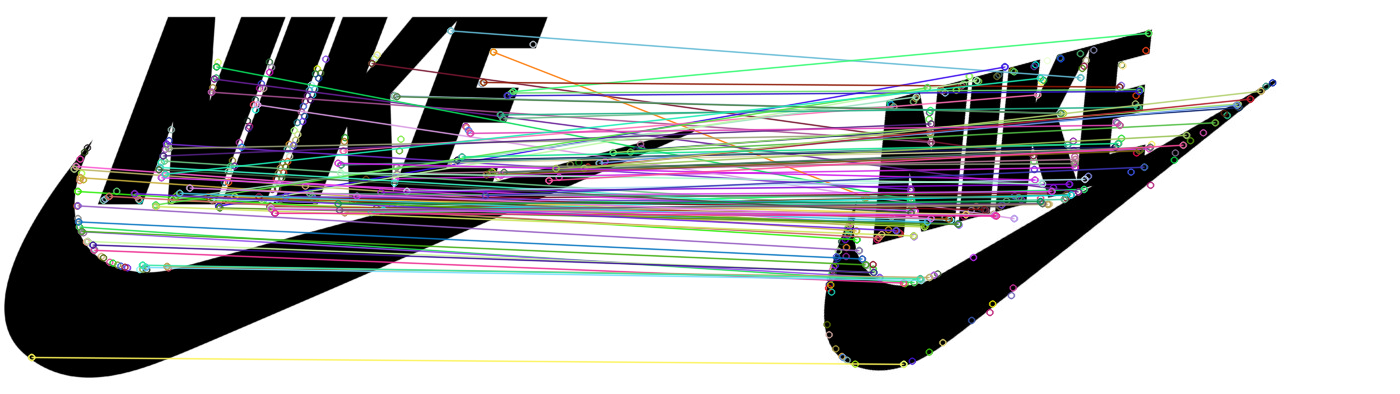

매치 1: QueryIdx=146, TrainIdx=76, Distance=10.0
매치 2: QueryIdx=133, TrainIdx=52, Distance=11.0
매치 3: QueryIdx=153, TrainIdx=64, Distance=11.0
매치 4: QueryIdx=156, TrainIdx=78, Distance=11.0
매치 5: QueryIdx=207, TrainIdx=161, Distance=11.0
매치 6: QueryIdx=84, TrainIdx=39, Distance=12.0
매치 7: QueryIdx=149, TrainIdx=41, Distance=12.0
매치 8: QueryIdx=209, TrainIdx=164, Distance=13.0
매치 9: QueryIdx=56, TrainIdx=85, Distance=14.0
매치 10: QueryIdx=155, TrainIdx=58, Distance=14.0

상위 10개 매치의 평균 디스턴스: 11.9
이미지 유사성 (정확도): 70.41%


In [ ]:
# 회전하고 다른 사이즈
calculate_image_similarity(image_paths[9], image_paths[7])

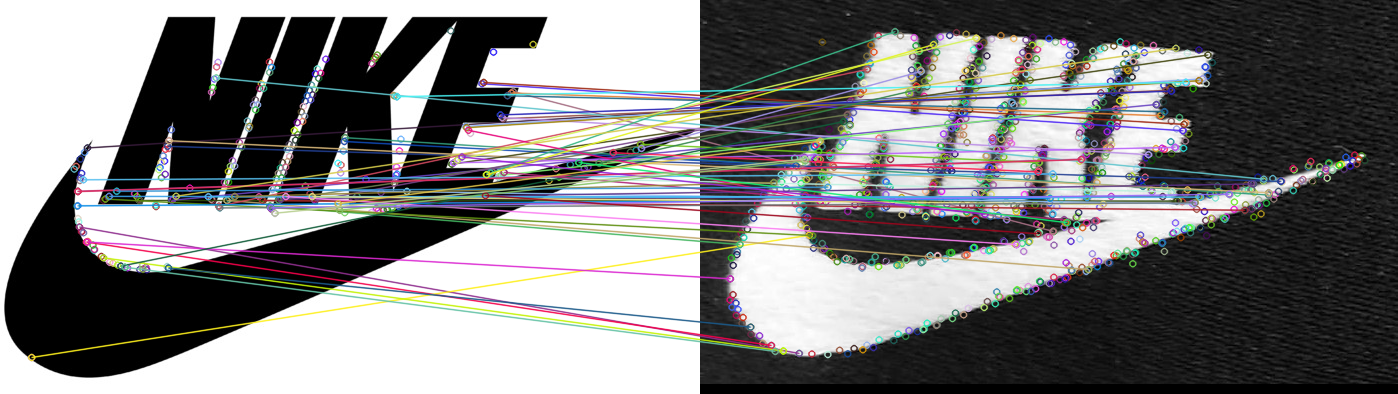

매치 1: QueryIdx=84, TrainIdx=363, Distance=25.0
매치 2: QueryIdx=58, TrainIdx=286, Distance=39.0
매치 3: QueryIdx=77, TrainIdx=602, Distance=44.0
매치 4: QueryIdx=177, TrainIdx=416, Distance=46.0
매치 5: QueryIdx=62, TrainIdx=521, Distance=48.0
매치 6: QueryIdx=168, TrainIdx=285, Distance=48.0
매치 7: QueryIdx=16, TrainIdx=279, Distance=49.0
매치 8: QueryIdx=18, TrainIdx=238, Distance=50.0
매치 9: QueryIdx=55, TrainIdx=261, Distance=50.0
매치 10: QueryIdx=110, TrainIdx=152, Distance=50.0

상위 10개 매치의 평균 디스턴스: 44.9
이미지 유사성 (정확도): 10.14%


In [ ]:
# 옷의 로고와 분석
calculate_image_similarity(image_paths[9], image_paths[1])

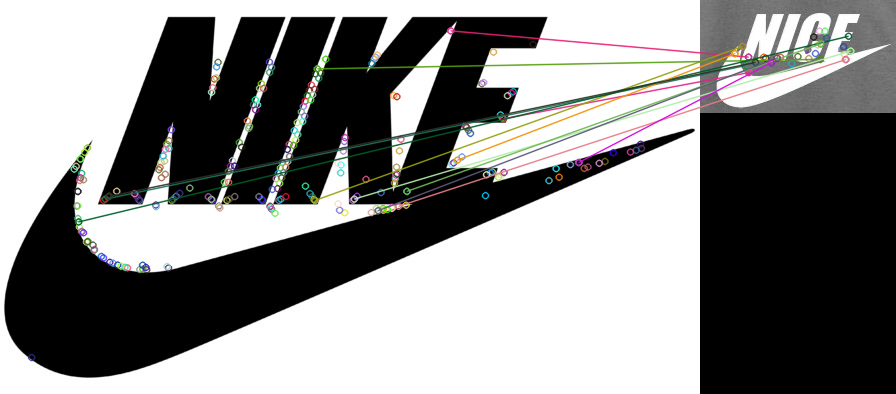

매치 1: QueryIdx=155, TrainIdx=16, Distance=92.0
매치 2: QueryIdx=179, TrainIdx=8, Distance=96.0
매치 3: QueryIdx=147, TrainIdx=28, Distance=97.0
매치 4: QueryIdx=46, TrainIdx=6, Distance=101.0
매치 5: QueryIdx=14, TrainIdx=24, Distance=102.0
매치 6: QueryIdx=163, TrainIdx=2, Distance=104.0
매치 7: QueryIdx=26, TrainIdx=12, Distance=112.0
매치 8: QueryIdx=204, TrainIdx=11, Distance=122.0
매치 9: QueryIdx=0, TrainIdx=19, Distance=125.0
매치 10: QueryIdx=192, TrainIdx=25, Distance=131.0

상위 10개 매치의 평균 디스턴스: 108.2
이미지 유사성 (정확도): 0.00%


In [ ]:
# 옷의 로고와 분석
calculate_image_similarity(image_paths[9], image_paths[3])

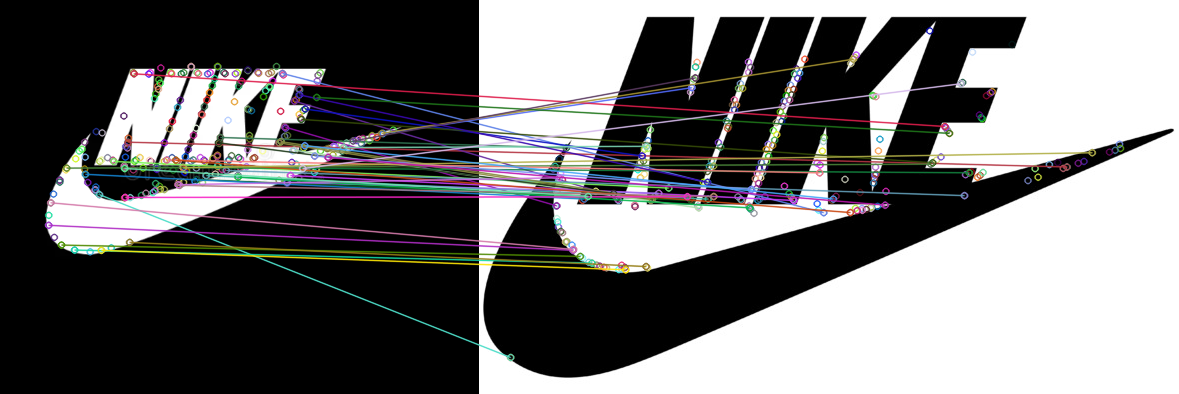

매치 1: QueryIdx=40, TrainIdx=56, Distance=19.0
매치 2: QueryIdx=41, TrainIdx=57, Distance=22.0
매치 3: QueryIdx=119, TrainIdx=64, Distance=26.0
매치 4: QueryIdx=114, TrainIdx=166, Distance=28.0
매치 5: QueryIdx=118, TrainIdx=59, Distance=28.0
매치 6: QueryIdx=150, TrainIdx=1, Distance=30.0
매치 7: QueryIdx=18, TrainIdx=8, Distance=43.0
매치 8: QueryIdx=121, TrainIdx=7, Distance=46.0
매치 9: QueryIdx=203, TrainIdx=209, Distance=46.0
매치 10: QueryIdx=127, TrainIdx=27, Distance=49.0

상위 10개 매치의 평균 디스턴스: 33.7
이미지 유사성 (정확도): 21.74%


In [ ]:
# 옷의 로고와 분석
calculate_image_similarity(image_path10, image_paths[9])

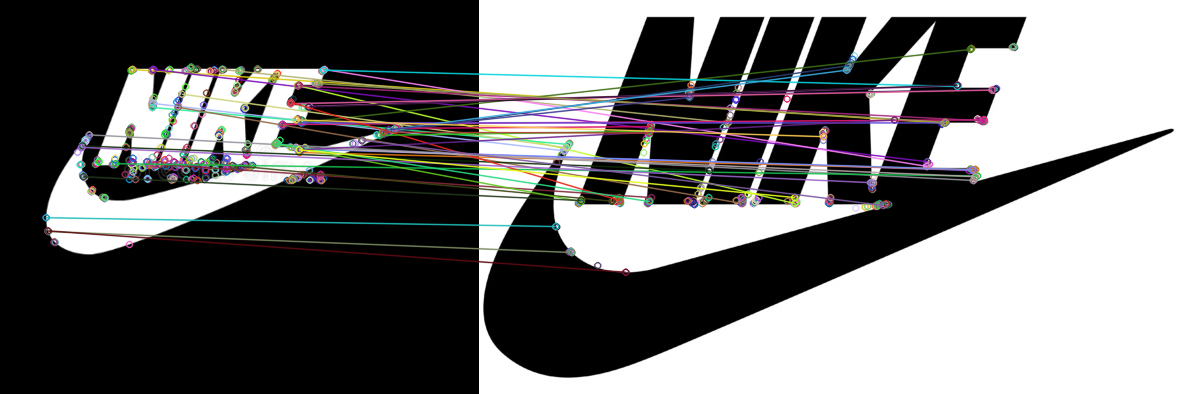

매치 1: QueryIdx=17, TrainIdx=120, Distance=3.0
매치 2: QueryIdx=18, TrainIdx=41, Distance=3.0
매치 3: QueryIdx=349, TrainIdx=39, Distance=4.0
매치 4: QueryIdx=391, TrainIdx=9, Distance=6.0
매치 5: QueryIdx=0, TrainIdx=114, Distance=7.0
매치 6: QueryIdx=288, TrainIdx=115, Distance=7.0
매치 7: QueryIdx=13, TrainIdx=100, Distance=8.0
매치 8: QueryIdx=22, TrainIdx=71, Distance=8.0
매치 9: QueryIdx=23, TrainIdx=113, Distance=8.0
매치 10: QueryIdx=367, TrainIdx=49, Distance=8.0

상위 10개 매치의 평균 디스턴스: 6.2
이미지 유사성 (정확도): 69.57%


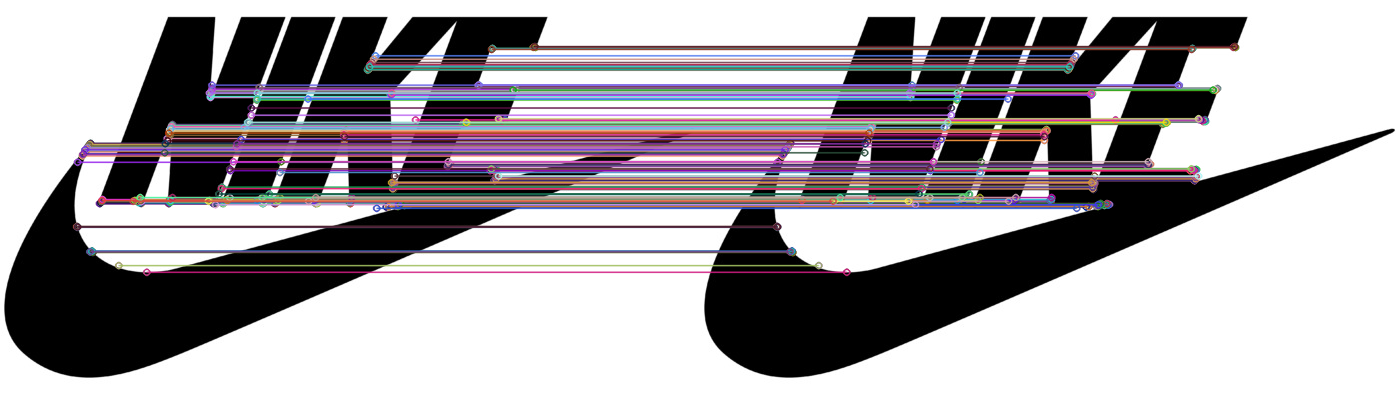

매치 1: QueryIdx=0, TrainIdx=0, Distance=0.0
매치 2: QueryIdx=1, TrainIdx=1, Distance=0.0
매치 3: QueryIdx=2, TrainIdx=2, Distance=0.0
매치 4: QueryIdx=3, TrainIdx=3, Distance=0.0
매치 5: QueryIdx=4, TrainIdx=4, Distance=0.0
매치 6: QueryIdx=5, TrainIdx=5, Distance=0.0
매치 7: QueryIdx=6, TrainIdx=6, Distance=0.0
매치 8: QueryIdx=7, TrainIdx=7, Distance=0.0
매치 9: QueryIdx=8, TrainIdx=8, Distance=0.0
매치 10: QueryIdx=9, TrainIdx=9, Distance=0.0

상위 10개 매치의 평균 디스턴스: 0.0
이미지 유사성 (정확도): 100.00%


In [ ]:
# 옷의 로고와 분석
calculate_image_similarity(image_path10, image_paths[9])
calculate_image_similarity(image_path1, image_paths[9])

In [ ]:
# 옷의 로고와 분석
calculate_image_similarity(image_path10, image_paths[1])

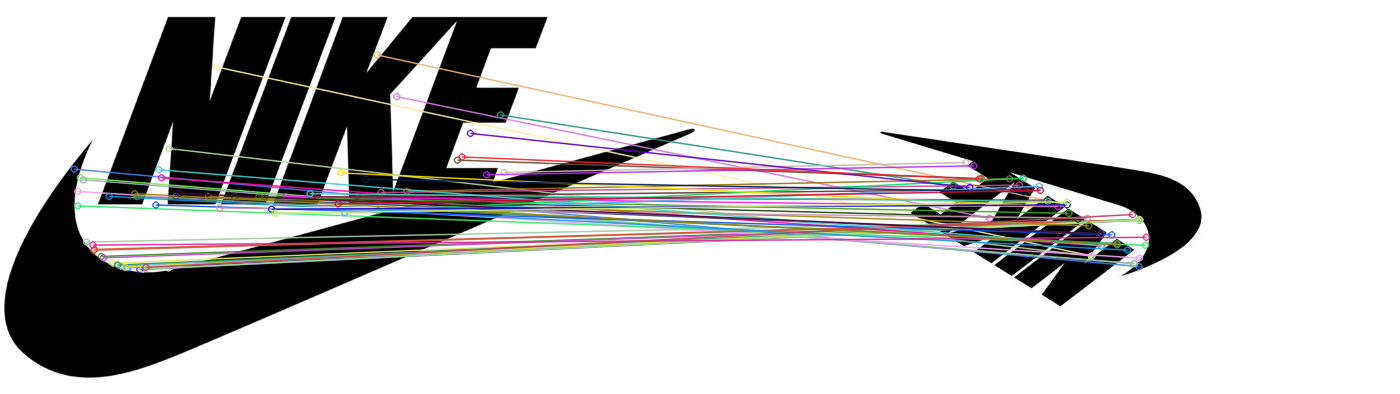

유사도: 22.76%


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# 이미지 불러오기
img1 = cv2.imread(image_path1)
img2 = cv2.imread(image_path2)

# AKAZE 디텍터 및 디스크립터 초기화
akaze = cv2.AKAZE_create()

# 키포인트 및 디스크립터 추출
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher 초기화
bf = cv2.BFMatcher()

# 매칭 수행
matches = bf.knnMatch(des1, des2, k=2)

# 좋은 매칭 필터링
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# 매칭 결과 표시
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 결과 표시
cv2_imshow(img_matches)

# 이미지 유사도 계산
similarity = len(good_matches) / max(len(kp1), len(kp2))

print(f"유사도: {similarity * 100:.2f}%")


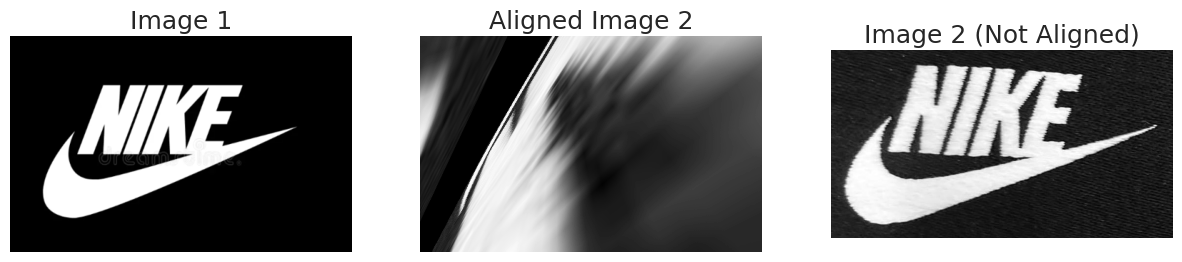

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def align_images(image1, image2, matches, keypoints1, keypoints2):
    points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return aligned_img

def display_aligned_images(image1, image2, aligned_img):
    sns.set(style="whitegrid", context="talk")

    # 두 이미지를 함께 표시
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title('Image 1')

    axes[1].imshow(aligned_img, cmap='gray')
    axes[1].set_title('Aligned Image 2')

    # 정렬되지 않은 Image 2
    axes[2].imshow(image2, cmap='gray')
    axes[2].set_title('Image 2 (Not Aligned)')

    # 축 제거
    for ax in axes:
        ax.axis('off')

    plt.show()


# 이미지 불러오기
img1 = cv2.imread(image_path10 , cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_paths[1], cv2.IMREAD_GRAYSCALE)

# AKAZE 디텍터 및 디스크립터 초기화
akaze = cv2.ORB_create()

# 키포인트 및 디스크립터 추출
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher 초기화
bf = cv2.BFMatcher()

# 매칭 수행
matches = bf.knnMatch(des1, des2, k=2)

# 좋은 매칭 필터링
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# 이미지 정렬
aligned_img = align_images(img1, img2, good_matches, kp1, kp2)

# 결과 이미지 표시
display_aligned_images(img1, img2, aligned_img)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def align_images(image1, image2, matches, keypoints1, keypoints2):
    points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return aligned_img

def display_aligned_images(image1, image2, aligned_img):
    sns.set(style="whitegrid", context="talk")

    # 두 이미지를 함께 표시
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title('Image 1')

    axes[1].imshow(aligned_img, cmap='gray')
    axes[1].set_title('Aligned Image 2')

    # 정렬되지 않은 Image 2
    axes[2].imshow(image2, cmap='gray')
    axes[2].set_title('Image 2 (Not Aligned)')

    # 축 제거
    for ax in axes:
        ax.axis('off')

    plt.show()


# 이미지 불러오기
img1 = cv2.imread(image_path10, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)

# AKAZE 디텍터 및 디스크립터 초기화
akaze = cv2.ORB_create()

# 키포인트 및 디스크립터 추출
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher 초기화
bf = cv2.BFMatcher()

# 매칭 수행
matches = bf.knnMatch(des1, des2, k=2)

# 좋은 매칭 필터링
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# 이미지 정렬
aligned_img = align_images(img1, img2, good_matches, kp1, kp2)

# 결과 이미지 표시
display_aligned_images(img1, img2, aligned_img)


error: OpenCV(4.8.0) /io/opencv/modules/calib3d/src/fundam.cpp:385: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'findHomography'


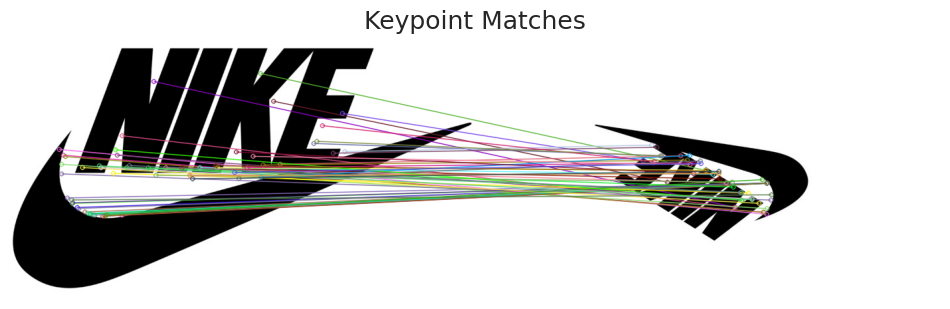

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def align_images(image1, image2, matches, keypoints1, keypoints2):
    points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return aligned_img

def display_keypoint_matches(image1, image2, matches, keypoints1, keypoints2):
    # 키포인트 매칭 결과 시각화
    img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # 이미지 표시
    plt.figure(figsize=(12, 6))
    plt.imshow(img_matches)
    plt.title('Keypoint Matches')
    plt.axis('off')
    plt.show()


# 이미지 불러오기
img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

# AKAZE 디텍터 및 디스크립터 초기화
akaze = cv2.AKAZE_create()

# 키포인트 및 디스크립터 추출
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher 초기화
bf = cv2.BFMatcher()

# 매칭 수행
matches = bf.knnMatch(des1, des2, k=2)

# 좋은 매칭 필터링
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# 이미지에 대한 특징점 매칭 결과 시각화
display_keypoint_matches(img1, img2, good_matches, kp1, kp2)


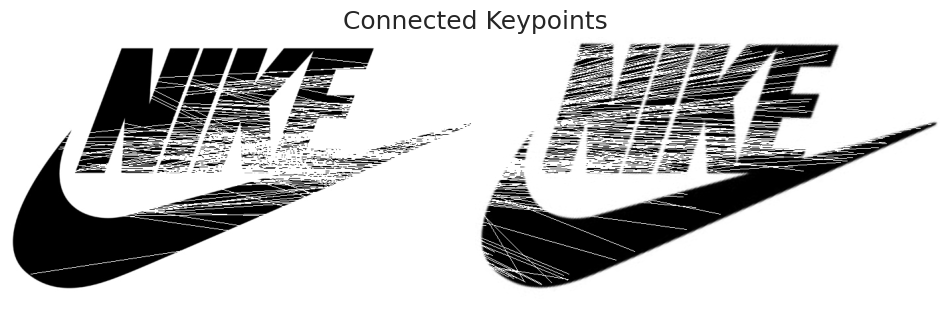

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def align_images(image1, image2, matches, keypoints1, keypoints2):
    points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return aligned_img, M

def connect_keypoints(image1, image2, keypoints1, keypoints2, matches, M):
    # 이미지1과 이미지2를 가로로 연결
    connected_img = np.concatenate((image1, image2), axis=1)

    # keypoints2를 행렬로 변환
    keypoints2_matrix = np.float32([kp.pt for kp in keypoints2]).reshape(-1, 1, 2)

    # 이미지2의 키포인트 좌표를 정렬된 이미지2의 좌표계로 변환
    h, w = image1.shape[:2]
    points2_transformed = cv2.perspectiveTransform(keypoints2_matrix, M).reshape(-1, 2) + (w, 0)

    # 이미지1과 정렬된 이미지2의 키포인트를 선으로 연결
    for pt1, pt2 in zip(keypoints1, points2_transformed):
        pt1 = tuple(map(int, pt1.pt))
        pt2 = tuple(map(int, pt2))
        cv2.line(connected_img, pt1, pt2, (255, 0, 0), 1)

    return connected_img

def display_connected_keypoints(image1, image2, connected_img):
    sns.set(style="whitegrid", context="talk")

    # 이미지와 연결된 키포인트 시각화
    plt.figure(figsize=(12, 6))
    plt.imshow(connected_img, cmap='gray')
    plt.title('Connected Keypoints')
    plt.axis('off')
    plt.show()

# 이미지 불러오기
img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

# AKAZE 디텍터 및 디스크립터 초기화
akaze = cv2.AKAZE_create()

# 키포인트 및 디스크립터 추출
kp1, des1 = akaze.detectAndCompute(img1, None)
kp2, des2 = akaze.detectAndCompute(img2, None)

# Brute-Force Matcher 초기화
bf = cv2.BFMatcher()

# 매칭 수행
matches = bf.knnMatch(des1, des2, k=2)

# 좋은 매칭 필터링
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# 이미지2를 이미지1에 정렬
aligned_img2, M = align_images(img1, img2, good_matches, kp1, kp2)

# 정렬된 이미지2와 이미지1의 특징점을 연결하여 시각화
connected_img = connect_keypoints(img1, aligned_img2, kp1, kp2, good_matches, M)

# 결과 시각화
display_connected_keypoints(img1, aligned_img2, connected_img)


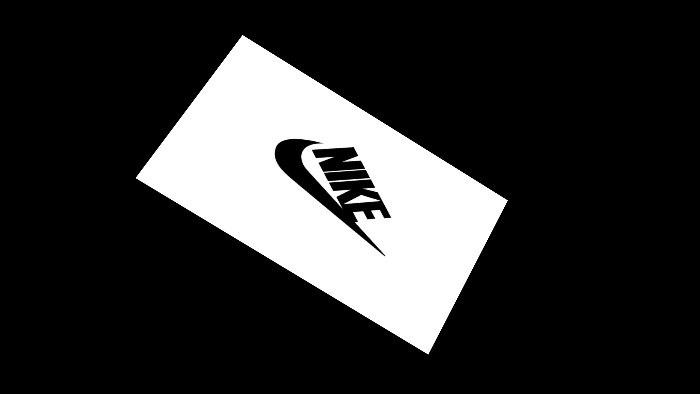

In [ ]:
import cv2
import numpy as np

def align_images(img1, img2):
    # ORB 특징점 추출기 생성
    orb = cv2.ORB_create()

    # 각 이미지에서 특징점과 디스크립터 추출
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    # Brute-Force Matcher 생성
    bf = cv2.BFMatcher()

    # 디스크립터 매칭
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # 좋은 매칭 선별
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # 좋은 매칭의 특징점 좌표 구하기
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # 변환 행렬 구하기
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # 이미지 정합
    aligned_img = cv2.warpPerspective(img2, M, (img1.shape[1], img1.shape[0]))

    return aligned_img

# 예시 이미지 로드
img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

# 이미지 정합
aligned_img1 = align_images(img1, img2)


from google.colab.patches import cv2_imshow

# 결과 이미지 출력
cv2_imshow(aligned_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

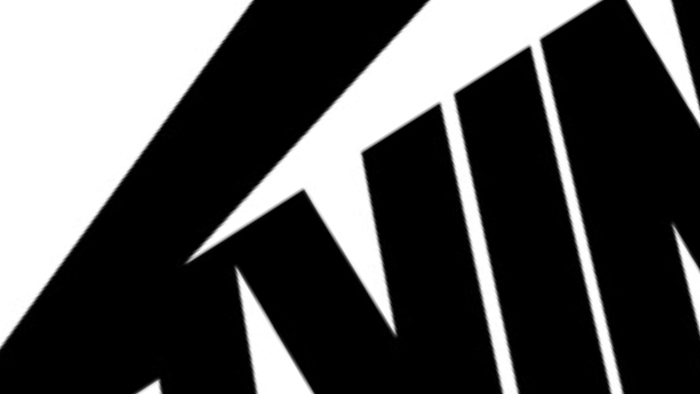

In [ ]:

aligned_img2 = align_images(img2, img1)

cv2_imshow(aligned_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

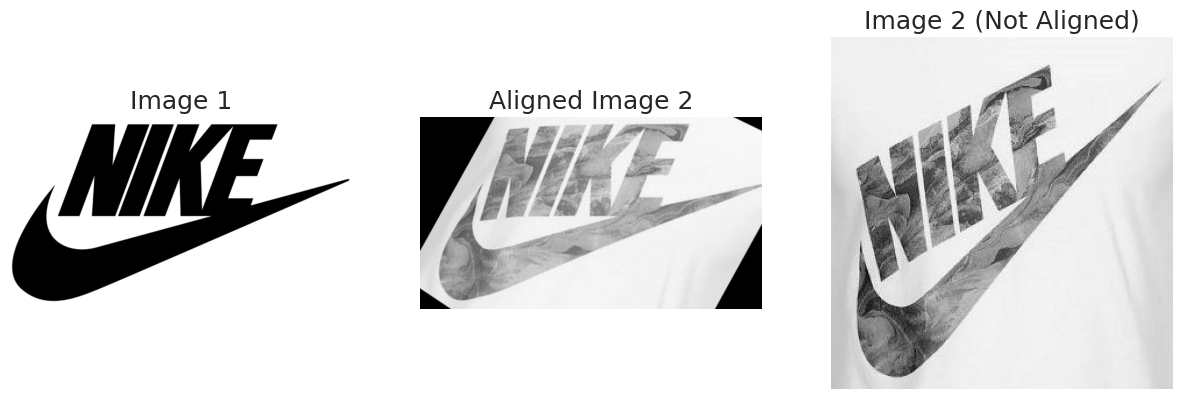

In [ ]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def align_images(image1, image2, matches, keypoints1, keypoints2):
    points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return aligned_img

def display_aligned_images(image1, image2, aligned_img):
    sns.set(style="whitegrid", context="talk")

    # 두 이미지를 함께 표시
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title('Image 1')

    axes[1].imshow(aligned_img, cmap='gray')
    axes[1].set_title('Aligned Image 2')

    # 정렬되지 않은 Image 2
    axes[2].imshow(image2, cmap='gray')
    axes[2].set_title('Image 2 (Not Aligned)')

    # 축 제거
    for ax in axes:
        ax.axis('off')

    plt.show()

# 이미지 읽기
image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image_path3, cv2.IMREAD_GRAYSCALE)

# ORB 특징 디스크립터 추출기 생성
orb = cv2.ORB_create()

# 특징 포인트 및 디스크립터 찾기
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# BFMatcher 객체 생성 및 매칭 수행
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# 이미지 정렬
aligned_img = align_images(image1, image2, matches, keypoints1, keypoints2)

# 정렬된 이미지와 원본 이미지를 함께 표시
display_aligned_images(image1, image2, aligned_img)

In [ ]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def extract_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return keypoints, descriptors

def align_images(image1, image2, keypoints1, descriptors1, keypoints2, descriptors2):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # 거리를 기준으로 매치 정렬
    matches = sorted(matches, key=lambda x: x.distance)

    # 상위 10개의 매치 선택
    top_matches = matches[:10]

    points1 = np.float32([keypoints1[match.queryIdx].pt for match in top_matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[match.trainIdx].pt for match in top_matches]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return aligned_img

def evaluate_similarity(matches, threshold=60):
    accurate_matches = [match for match in matches if match.distance < threshold]
    accuracy = len(accurate_matches) / len(matches) * 100
    return accuracy

def display_comparison(image1, aligned_img, image2):
    sns.set(style="whitegrid", context="talk")

    # 이미지를 함께 표시
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title('Image 1')

    axes[1].imshow(aligned_img, cmap='gray')
    axes[1].set_title('Aligned Image 2')

    # 정렬되지 않은 Image 2
    axes[2].imshow(image2, cmap='gray')
    axes[2].set_title('Image 2 (Not Aligned)')

    # 축 제거
    for ax in axes:
        ax.axis('off')

    plt.show()

# 이미지1과 이미지2의 특징 추출
keypoints1, descriptors1 = extract_features(image_path1)
keypoints2, descriptors2 = extract_features(image_path6)

# 이미지2를 이미지1에 맞춰 정렬
aligned_img = align_images(cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE), cv2.imread(image_path6, cv2.IMREAD_GRAYSCALE), keypoints1, descriptors1, keypoints2, descriptors2)

# 이미지1, 정렬된 이미지2, 이미지2를 함께 표시
display_comparison(cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE), aligned_img, cv2.imread(image_path6, cv2.IMREAD_GRAYSCALE))

# 유사도 평가
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
accuracy = evaluate_similarity(matches)
print("이미지 유사성 (정확도): {:.2f}%".format(accuracy))


In [ ]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def extract_features(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray_image, None)
    return keypoints, descriptors, image

def align_images(image1, image2, keypoints1, descriptors1, keypoints2, descriptors2):
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    points1 = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return aligned_img, matches, points1, points2

def evaluate_similarity(matches, threshold=50):
    accurate_matches = [match for match in matches if match.distance < threshold]
    accuracy = len(accurate_matches) / len(matches) * 100
    return accuracy

def display_comparison(image1, aligned_img, image2, matches, points1, points2):
    sns.set(style="whitegrid", context="talk")

    # 이미지를 함께 표시
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Image 1')

    axes[1].imshow(cv2.cvtColor(aligned_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Aligned Image 2')

    # 정렬되지 않은 Image 2
    axes[2].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Image 2 (Not Aligned)')

    # 축 제거
    for ax in axes:
        ax.axis('off')

    # 이미지1과 이미지2의 특징점을 이어주는 선 추가
    min_height = min(image1.shape[0], aligned_img.shape[0], image2.shape[0])
    img_combined = np.concatenate((image1[:min_height, :], aligned_img[:min_height, :], image2[:min_height, :]), axis=1)
    for i in range(len(matches)):
        pt1 = (int(points1[i][0][0]), int(points1[i][0][1]))
        pt2 = (int(points2[i][0][0] + image1.shape[1]), int(points2[i][0][1]))
        cv2.line(img_combined, pt1, pt2, (255, 0, 0), 1)  # 파란색 선 추가

    cv2_imshow(img_combined)

    plt.show()

# 이미지1과 이미지2의 특징 추출
keypoints1, descriptors1, image1 = extract_features(image_path1)
keypoints2, descriptors2, image2 = extract_features(image_path6)

# 이미지2를 이미지1에 맞춰 정렬
aligned_img, matches, points1, points2 = align_images(image1, image2, keypoints1, descriptors1, keypoints2, descriptors2)

# 이미지1, 정렬된 이미지2, 이미지2를 함께 표시 및 특징점 이어주는 선 추가
display_comparison(image1, aligned_img, image2, matches, points1, points2)

# 유사도 평가
accuracy = evaluate_similarity(matches)
print("이미지 유사성 (정확도): {:.2f}%".format(accuracy))


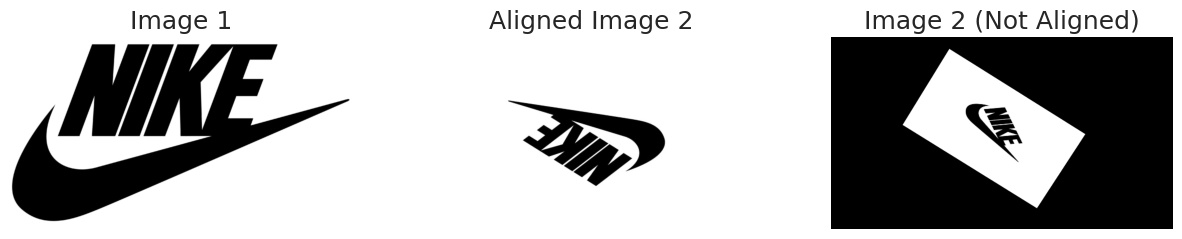

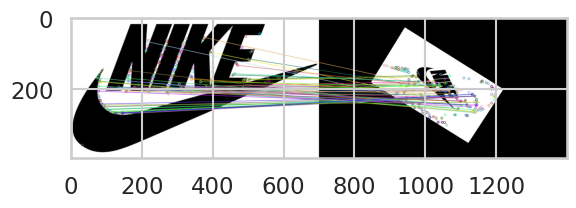

두 이미지의 유사도: 0.22764227642276422


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 이미지를 로드하고 AKAZE로 특징점 추출 및 매칭
def align_images(image1_path, image2_path):
    # 이미지 로드
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # AKAZE 디스크립터 생성
    akaze = cv2.AKAZE_create()

    # 특징점과 디스크립터 추출
    keypoints1, descriptors1 = akaze.detectAndCompute(image1, None)
    keypoints2, descriptors2 = akaze.detectAndCompute(image2, None)

    # BFMatcher로 매칭
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # 좋은 매칭 선택
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # 좋은 매칭만을 이용한 이미지 정렬
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # 변환 행렬 계산
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # 이미지 정렬
    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return image1, image2, aligned_img, keypoints1, keypoints2, good_matches

def display_aligned_images(image1, aligned_img, image2):
    sns.set(style="whitegrid", context="talk")

    # 두 이미지를 함께 표시
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title('Image 1')

    axes[1].imshow(aligned_img, cmap='gray')
    axes[1].set_title('Aligned Image 2')

    # 정렬되지 않은 Image 2
    axes[2].imshow(image2, cmap='gray')
    axes[2].set_title('Image 2 (Not Aligned)')

    # 축 제거
    for ax in axes:
        ax.axis('off')

    plt.show()


# 2. 정렬된 이미지를 저장
def save_aligned_image(aligned_img, output_path):
    cv2.imwrite(output_path, aligned_img)

# 3. 특징점 매칭 시각화
def visualize_feature_matching(image1, keypoints1, image2, keypoints2, matches):
    result_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None)
    plt.imshow(result_image)
    plt.show()

# 4. 이미지 경로 정의
base_path = "/content/drive/MyDrive/Colab Notebooks/data/3조_수집_데이터/비교로고/"
image_path1 = base_path + "nike.jpg"
image_path2 = base_path + "nike_logo_tilted_02.jpg"

# 5. 이미지 정렬 및 결과 표시
image1, image2, aligned_img, keypoints1, keypoints2, good_matches = align_images(image_path1, image_path2)
display_aligned_images(image1, image2, aligned_img)

# 6. 정렬된 이미지 저장
output_path = base_path + "aligned_nike_logo.jpg"
save_aligned_image(aligned_img, output_path)

# 7. 특징점 매칭 시각화
visualize_feature_matching(image1, keypoints1, aligned_img, keypoints2, good_matches)

# 8. 두 이미지의 유사도 출력
similarity = len(good_matches) / max(len(keypoints1), len(keypoints2))
print(f"두 이미지의 유사도: {similarity}")


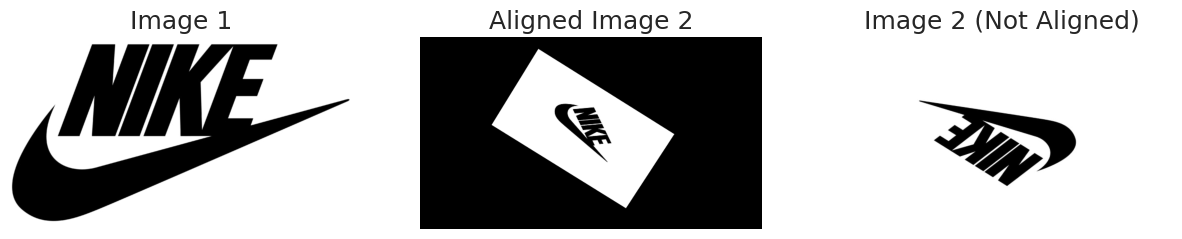

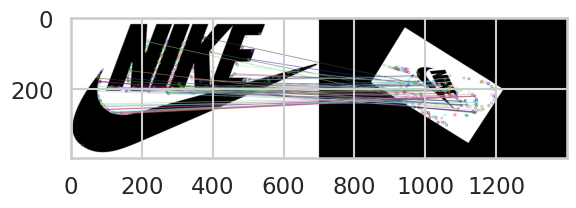

두 이미지의 유사도: 0.22764227642276422


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 이미지를 로드하고 ORB로 특징점 추출 및 매칭
def align_images(image1_path, image2_path):
    # 이미지 로드
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # ORB 디스크립터 생성
    orb = cv2.AKAZE_create()

    # 특징점과 디스크립터 추출
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # BFMatcher로 매칭
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    # 좋은 매칭 선택
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # 좋은 매칭만을 이용한 이미지 정렬
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # 변환 행렬 계산
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # 이미지 정렬
    aligned_img = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

    return image1, image2, aligned_img, keypoints1, keypoints2, good_matches

# 2. 정렬된 이미지를 저장
def save_aligned_image(aligned_img, output_path):
    cv2.imwrite(output_path, aligned_img)

# 3. 특징점 매칭 시각화
def visualize_feature_matching(image1, keypoints1, image2, keypoints2, matches):
    result_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None)
    plt.imshow(result_image)
    plt.show()

# 4. 이미지 경로 정의
base_path = "/content/drive/MyDrive/Colab Notebooks/data/3조_수집_데이터/비교로고/"
image_path1 = base_path + "nike.jpg"
image_path2 = base_path + "nike_logo_tilted_02.jpg"

# 5. 이미지 정렬 및 결과 표시
image1, image2, aligned_img, keypoints1, keypoints2, good_matches = align_images(image_path1, image_path2)
display_aligned_images(image1, aligned_img, image2)

# 6. 정렬된 이미지 저장
output_path = base_path + "aligned_nike_logo.jpg"
save_aligned_image(aligned_img, output_path)

# 7. 특징점 매칭 시각화
visualize_feature_matching(image1, keypoints1, aligned_img, keypoints2, good_matches)

# 8. 두 이미지의 유사도 출력
similarity = len(good_matches) / max(len(keypoints1), len(keypoints2))
print(f"두 이미지의 유사도: {similarity}")
